In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("Customer_Behaviour.csv")

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


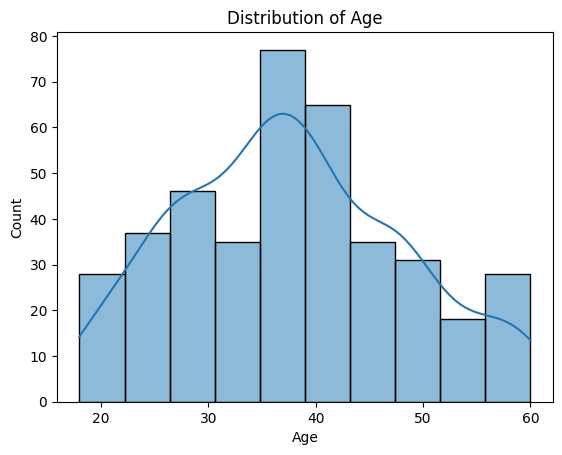

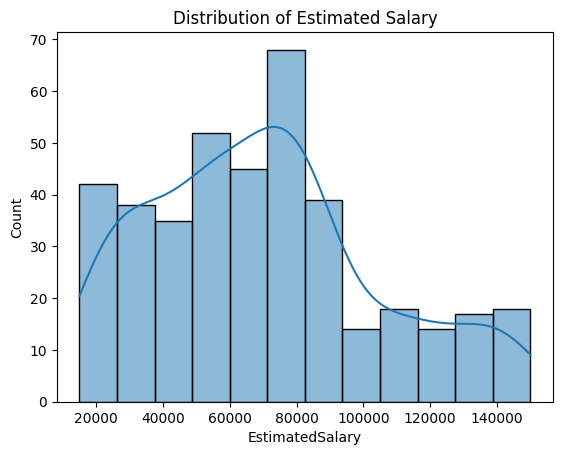

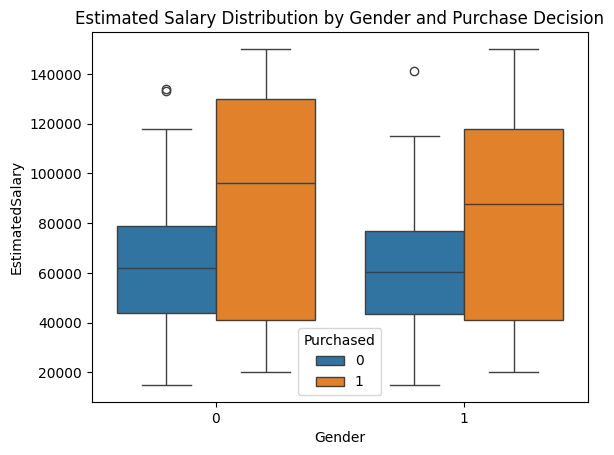

In [ ]:
sb.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sb.histplot(data['EstimatedSalary'], kde=True)
plt.title('Distribution of Estimated Salary')
plt.show()

sb.boxplot(x='Gender', y='EstimatedSalary', hue='Purchased', data=data)
plt.title('Estimated Salary Distribution by Gender and Purchase Decision')
plt.show()

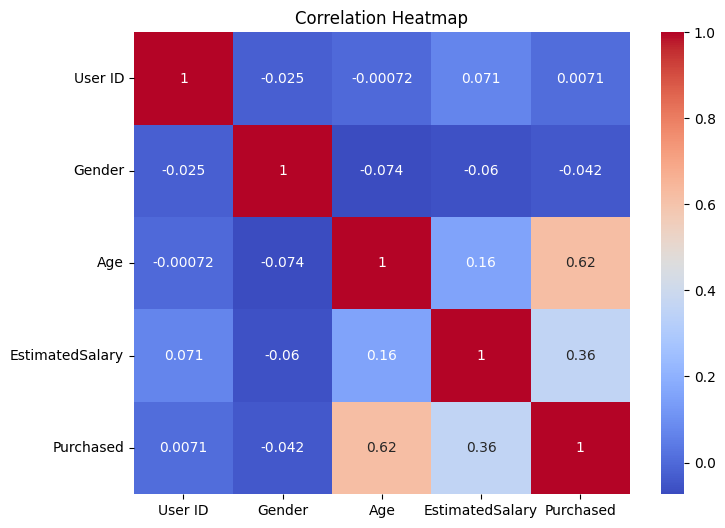

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
duplicate_user_ids = data[data.duplicated(subset='User ID', keep=False)]
print(duplicate_user_ids)

Empty DataFrame
Columns: [User ID, Gender, Age, EstimatedSalary, Purchased]
Index: []


In [ ]:
enc =  LabelEncoder()
data['Gender'] = pd.DataFrame(enc.fit_transform(data['Gender']))

In [ ]:
X = data[["Gender", "Age", "EstimatedSalary"]]
Y = data["Purchased"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#SVM
SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.778125
Test set acc:  0.7375


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(XTrain, YTrain)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.641 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
grid_predictions = grid.predict(XTest)
SVM_test_acc = metrics.accuracy_score(YTest, grid_predictions)
print(classification_report(YTest, grid_predictions))
print("Test set acc:", SVM_test_acc)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        52
           1       0.80      0.57      0.67        28

    accuracy                           0.80        80
   macro avg       0.80      0.75      0.76        80
weighted avg       0.80      0.80      0.79        80

Test set acc: 0.8


In [ ]:
#KNN
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=neighbor).fit(XTrain, YTrain)
    CTest = KNN.predict(XTest)
    print("N:", neighbor, "-", metrics.accuracy_score(YTest, CTest))

KNN = KNeighborsClassifier(n_neighbors = 5).fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

N: 2 - 0.7625
N: 3 - 0.8
N: 4 - 0.8
N: 5 - 0.825
N: 6 - 0.775
N: 7 - 0.8125
N: 8 - 0.775
N: 9 - 0.8
N: 10 - 0.775
N: 11 - 0.8
N: 12 - 0.775
N: 13 - 0.75
N: 14 - 0.7625
N: 15 - 0.775
N: 16 - 0.75
N: 17 - 0.775
N: 18 - 0.7625
N: 19 - 0.7625
N: 20 - 0.75
N: 21 - 0.775
N: 22 - 0.7625
N: 23 - 0.7625
N: 24 - 0.7625
N: 25 - 0.775
N: 26 - 0.775
N: 27 - 0.7875
N: 28 - 0.7875
N: 29 - 0.7875
Train set acc:  0.88125
Test set acc:  0.825


In [ ]:
KNN_test_acc = metrics.accuracy_score(YTest, CTest)
print(classification_report(YTest, CTest))
print("Test set acc:", KNN_test_acc)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80

Test set acc: 0.825


In [ ]:
#Naive Bayes
GNB = GaussianNB().fit(XTrain, YTrain)
CTest  = GNB.predict(XTest)
CTrain  = GNB.predict(XTrain)
GNB_train_acc = metrics.accuracy_score(YTrain, CTrain)
GNB_test_acc = metrics.accuracy_score(YTest, CTest)
print("Train set acc: ", GNB_train_acc)
print("Test set acc: ", GNB_test_acc)
print(classification_report(YTest, CTest))
# Hyperparameter tuning didn't change the acc

Train set acc:  0.8625
Test set acc:  0.9375
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



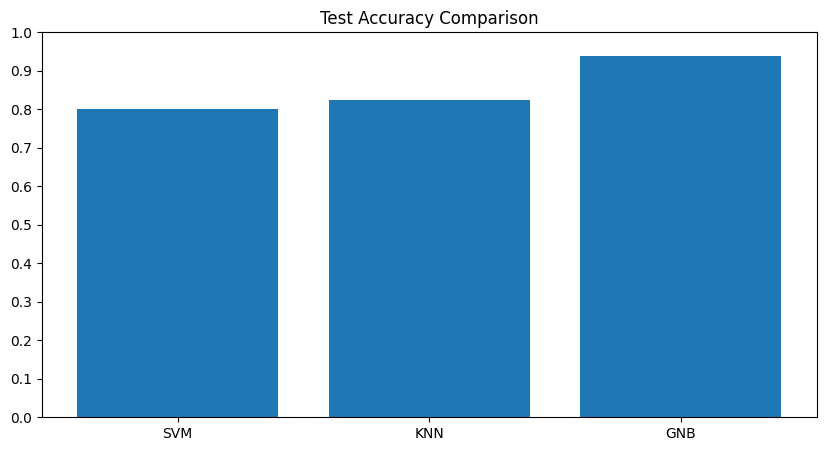

In [ ]:
plot_data = {'SVM':SVM_test_acc, 'KNN':KNN_test_acc, 'GNB':GNB_test_acc}
acc_type = list(plot_data.keys())
values = list(plot_data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(acc_type, values)
plt.title("Test Accuracy Comparison")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()